In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import os
import tensorflow as tf

In [49]:
probabilities = np.array([[0.9, 0.3],[0.4, 0.6],[0.8, 0.2], [0.1, 0.9]])
actual = [[1, 0],[0, 1],[1, 0]]
#returns true if the positive class is greater than the threshold value
np.argmax(actual, axis=1)

array([0, 1, 0])

In [53]:
np.multiply((probabilities >= 0.3)[:, 1], 1)

array([1, 1, 0, 1])

In [52]:
np.arange(0.1, 1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [2]:
header = ['label','rndm','weight']
# boosted frame
header += ['W_B_pt','W_B_eta','W_B_phi','W_B_E','W_B_m']
header += ['b_B_pt','b_B_eta','b_B_phi','b_B_E','b_B_m']
header += ['Wjj_B_dR','tWb_B_dR'] #dR = sqrt(phi^2 + eta^2)
header += ['Wjj_B_deta','Wjj_B_dphi','tWb_B_deta','tWb_B_dphi']
# lab frame
header += ['W_pt','W_eta','W_phi','W_E','W_m']
header += ['b_pt','b_eta','b_phi','b_E','b_m']
header += ['Wjj_dR','tWb_dR']
header += ['Wjj_deta','Wjj_dphi','tWb_deta','tWb_dphi']
header += ['t_pt','t_eta','t_phi','t_E','t_m']

header += ['btag1', 'btag2', 'btag3']

In [6]:
df = pd.read_csv('~/projects/samples/norm_results.csv', delimiter=',')

In [ ]:
df2 = pd.read_csv('~/projects/top-reco-tests/samples/norm_results_0.2.csv', delimiter=',')

In [11]:
final_df = df

## 

In [7]:
df = df.drop("weight", axis=1)

In [13]:
y = final_df['label']
X_norm = final_df.drop('label', axis=1).drop('Unnamed: 0', axis=1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=.15, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.15, shuffle=True)

In [28]:
shuffled = pd.concat([X_train, y_train], axis=1)
shuffled = shuffled.sample(frac=1)
y_train = shuffled['label']
X_train = shuffled.drop('label', axis=1)

In [32]:
shuffled.head()

,W_B_pt,W_B_eta,W_B_phi,W_B_E,W_B_m,b_B_pt,b_B_eta,b_B_phi,b_B_E,b_B_m,...,tWb_dphi,t_pt,t_eta,t_phi,t_E,t_m,btag1,btag2,btag3,label
9289428,0.284276,0.475290,0.179876,0.183316,0.204684,0.284276,0.550235,0.513184,0.163020,0.391087,...,0.282043,0.341754,0.454891,0.489402,0.109778,0.177915,0.6,0.6,0.00,0
5763760,0.157276,0.587239,0.517330,0.234906,0.275388,0.157276,0.443351,0.184032,0.153446,0.184964,...,0.325140,0.160759,0.586308,0.183215,0.180613,0.209079,0.0,0.0,0.15,0
5788732,0.044093,0.284538,0.203821,0.363232,0.073151,0.044093,0.932760,0.537130,0.901407,0.000006,...,0.192153,0.191615,0.924170,0.461530,0.930537,0.488728,0.0,0.0,0.15,0
14078337,0.400714,0.540544,0.357760,0.302230,0.347738,0.400714,0.487933,0.024460,0.215171,0.247297,...,0.089704,0.178389,0.396003,0.519744,0.176495,0.276468,0.0,0.0,0.00,0
13282731,0.169897,0.431581,0.251222,0.241385,0.276902,0.169897,0.591966,0.584531,0.180413,0.220908,...,0.173944,0.210520,0.512100,0.392347,0.119360,0.223135,0.0,0.0,0.45,0


In [12]:
pos_class = df2[df2['label'] == 1]
neg_class = df2[df2['label'] == 0]
print(neg_class.shape)
neg_class = neg_class.sample(frac=0.2)
neg_class.shape
final_df = pd.concat([neg_class, pos_class])

(13759043, 43)


In [15]:
sum(final_df['label'])

1073837

In [18]:
y = df2['label']

In [20]:
y.values

array([1, 1, 0, ..., 1, 1, 1])

In [6]:
final_df.to_csv('~/projects/top-reco-tests/samples/norm_results_0.2.csv', sep=',')

In [42]:
count = 0
for chunk in pd.read_csv('~/projects/top-reco-tests/samples/norm_results_0.2.csv', chunksize=5):
    if (count == 1):
        break
    for row in chunk.iterrows():
        print(row[1]['label'])
    count += 1

1.0
1.0
0.0
0.0
0.0


In [7]:
df = pd.read_csv('~/projects/top-reco-tests/samples/norm_results_0.2.csv', delimiter=',')
df.head()

,Unnamed: 0,label,rndm,weight,W_B_pt,W_B_eta,W_B_phi,W_B_E,W_B_m,b_B_pt,...,tWb_deta,tWb_dphi,t_pt,t_eta,t_phi,t_E,t_m,btag1,btag2,btag3
0,2520510,0,0.88,0.000023,14.330167,3.347328,-1.425400,219.680227,81.678252,14.330167,...,4.092206,0.541214,102.724245,-0.415194,-3.121348,438.243632,423.767850,1.0,5.0,1.0
1,1273043,0,-0.82,-0.000012,66.450459,-1.203419,-0.388779,134.612403,59.674561,66.450459,...,-2.643688,2.564766,78.305473,0.074653,3.139745,267.438030,255.650380,1.0,1.0,1.0
2,6012520,0,-0.80,0.000021,46.572933,1.189640,-2.346657,184.410644,164.370607,46.572933,...,1.537668,0.134605,239.684110,1.859811,0.957736,833.410761,270.335153,5.0,5.0,1.0
3,1499060,0,-0.92,0.000011,55.134627,-0.070586,-0.067063,123.495591,110.436240,55.134627,...,0.042994,-2.888881,24.484248,0.695842,2.574804,181.796156,179.192965,1.0,1.0,5.0
4,4716200,0,-0.96,0.000023,75.830000,0.088819,-2.488214,222.716845,209.301511,75.830000,...,-0.918603,2.527513,47.073028,-2.847826,1.883668,506.295601,300.633925,1.0,1.0,5.0


In [8]:
#3d scatter plot before PCA

In [9]:
pca = PCA(n_components=5)
X_4 = pca.fit_transform(X)

In [10]:
print(y.shape)
X_4.shape

(2449741,)


(2449741, 5)

In [24]:
X_4 = pd.DataFrame(X_4)
pos_class = X_4.iloc[np.array(y == 1)].sample(frac=0.0001)
neg_class = X_4.iloc[np.array(y == 0)].sample(frac=0.00007)
print(pos_class.shape)
print(neg_class.shape)

(107, 5)
(96, 5)


Text(0.5, 0, 'PC3')

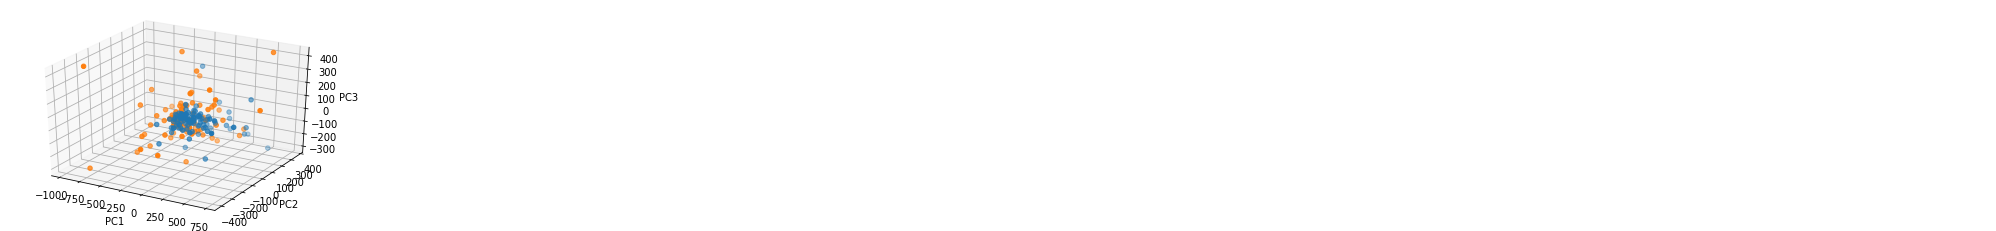

In [36]:
#3d scatter plot after PCA
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pos_class[pos_class.columns[2]], pos_class[pos_class.columns[3]], pos_class[pos_class.columns[4]], 'blue')
ax.scatter3D(neg_class[neg_class.columns[2]], neg_class[neg_class.columns[3]], neg_class[neg_class.columns[4]], 'orange')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

In [64]:
with open("~/projects/test.txt", "w+") as file:
    print("Writing model metrics to model_evaluation.txt")
    file.write("test Predictions: ")

Writing model metrics to model_evaluation.txt


In [79]:
arr = [(0.1, 0.9836634889191531, 0.63999083724104), (0.2, 0.8996966695555281, 0.28460547414247606), (0.30000000000000004, 0.7918781725888325, 0.14653142305161082), (0.4, 0.647709545623375, 0.06911338187009972), (0.5, 0.49301101894267674, 0.028840874631398932), (0.6, 0.3802339977714498, 0.013649602038107866), (0.7000000000000001, 0.2867834592051504, 0.006755716725307516), (0.8, 0.1779125913086542, 0.0023367459358437192), (0.9, 0.08388634393958153, 0.0005163141953679587)]

In [85]:
import matplotlib.pyplot as plt

In [86]:
array = np.array(arr)

In [87]:
x = array[:, 1:]
x[1]

array([0.89969667, 0.28460547])

Text(0, 0.5, 'Signal Efficiency')

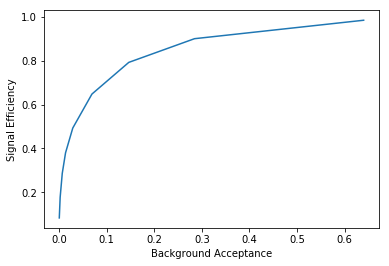

In [89]:
plt.plot(x[:, 1], x[:, 0])
plt.xlabel("Background Acceptance")
plt.ylabel("Signal Efficiency")